In [1]:
from glob import glob
from src.utils import *

In [2]:
get_isotopes_df()

,Isotope,Energies (keV),Notes
0,Cs-137,[661.7],Decay product: Ba-137m
1,Co-60,"[1173.2, 1332.5]",Dual gamma peaks for decay
2,I-131,[364.5],Used in medical diagnostics
3,Tc-99m,[140.5],Widely used in nuclear medicine
4,Ra-226,"[186.2, 609.3, 1120.3, 1764.5]",Includes a complex decay series
5,Th-232,"[338.3, 911.2, 2614.5]",Part of the decay chain
6,U-238,"[234.0, 1001.0]",Decay includes radon progeny
7,K-40,[1460.8],Natural isotope in potassium
8,Am-241,[59.5],Common in smoke detectors
9,Na-22,"[511.0, 1274.5]",Positron annihilation peak


In [3]:
df = pd.read_parquet('results_prominence_500.pq')
df["filename"] = df["filename"].str.replace("\\", "/")
df 


,filename,peaks,calculated_polynomial,fitted_peaks_mean,fitted_peaks_std,identified_isotopes,identified_peaks,confidences,matched,total_confidences
0,Daten/2016-11-21_09-27-54_Summenspektrum.txt,"[9, 18, 259, 293, 2278]","[2.17812347791993, 4.79180021167972, 74.783660...","[2.1949337017004584, 4.760360102175254, 74.747...","[0.4716261301219222, 1.2607007423117536, 1.515...",[Cs-137],[661.388601158579],[0.9305318283386198],[1.0],[0.9305318283386198]
1,Daten/2016-11-24_07-16-40_Summenspektrum.txt,"[7, 21, 33, 71, 259, 293, 393, 2278]","[1.59730766935897, 5.66302782423073, 9.1479484...","[1.6492874932310777, 5.569771912889466, 9.0775...","[0.2915364489251179, 1.1288644265372403, 1.862...","[Tc-99m, Cs-137]","[117.53795204100709, 661.4258973291809]","[0.586786135440607, 0.8712443050163385]","[1.0, 1.0]","[0.586786135440607, 0.8712443050163385]"
2,Daten/2016-11-25_12-59-15_Summenspektrum.txt,"[9, 259, 2277]","[2.17812347791993, 74.78366015242995, 661.1142...","[2.1346609530456644, 74.65888630314258, 661.21...","[0.3777388474551808, 1.2278336619783288, 0.742...",[Cs-137],[661.2144335733624],[0.8076640758257452],[1.0],[0.8076640758257452]
3,Daten/2016-11-28_07-17-31_Summenspektrum.txt,"[15, 2278]","[3.9205736164442504, 661.4048874141486]","[3.8037659790602976, 661.3662404003773]","[1.1770141331605322, 0.7891301659332648]",[Cs-137],[661.3662404003773],[0.9144415378645031],[1.0],[0.9144415378645031]
4,Daten/2016-11-29_08-48-54_Summenspektrum.txt,"[8, 14, 2277]","[1.8877155171219202, 3.6301649774358804, 661.1...","[1.9739906729137935, -0.4355441, 661.216748045...","[0.40350424822245456, 0.290407, 0.729150326590...",[Cs-137],[661.2167480452143],[0.8028192632682709],[1.0],[0.8028192632682709]
...,...,...,...,...,...,...,...,...,...,...
1241,Daten/2024-09-26_07-09-35_Summenspektrum.txt,[7],[1.59730766935897],[1.728441610166713],[0.3263001547939657],[],[],[],[],[]
1242,Daten/2024-09-27_07-18-35_Summenspektrum.txt,[7],[1.59730766935897],[1.744544938558834],[0.34737700884165684],[],[],[],[],[]
1243,Daten/2024-09-30_07-57-21_Summenspektrum.txt,[7],[1.59730766935897],[1.722876201249561],[0.3459508150054934],[],[],[],[],[]
1244,Daten/2024-10-01_07-53-29_Summenspektrum.txt,[7],[1.59730766935897],[1.6919035196010428],[0.33194257596543475],[],[],[],[],[]


In [4]:
process_spectrum(df.iloc[7]["filename"], prominence=1000, verbose=True) #if many peaks and high uncertainty it matches to many isotopes -> higher scoring threshold?

Peak at 50.870801 +- 8.431863 keV matched to Am-241 at 59.5 keV with confidence 0.59
Isotope Am-241 identified with 100.00% of peaks matched
Peak at 59.243071 +- 0.903989 keV matched to Am-241 at 59.5 keV with confidence 0.96
Isotope Am-241 identified with 100.00% of peaks matched
Peak at 119.095408 +- 10.747219 keV matched to Eu-152 at 121.8 keV with confidence 0.97
Isotope Eu-152 identified with 33.33% of peaks matched
Peak at 119.095408 +- 10.747219 keV matched to Eu-154 at 123.1 keV with confidence 0.93
Isotope Eu-154 not sufficiently identified
Peak at 121.917008 +- 2.284884 keV matched to Eu-152 at 121.8 keV with confidence 1.00
Isotope Eu-152 identified with 33.33% of peaks matched
Peak at 121.917008 +- 2.284884 keV matched to Eu-154 at 123.1 keV with confidence 0.87
Isotope Eu-154 not sufficiently identified
Peak at 124.785211 +- 2.598009 keV matched to Eu-152 at 121.8 keV with confidence 0.52
Isotope Eu-152 identified with 33.33% of peaks matched
Peak at 124.785211 +- 2.598009

,filename,data,peaks,properties,calculated_polynomial,fitted_peaks,fitted_peaks_mean,fitted_peaks_std,identified_isotopes,identified_peaks,confidences,matched,total_confidences
0,Daten/2017-04-13_13-36-00_Summenspektrum.txt,energy in keV counts 0 -0.6...,"[8, 34, 147, 158, 175, 195, 206, 213, 220, 240...","{'prominences': [717364.0, 6267642.0, 11979.0,...","[2.0858706080981757, 10.976063583773305, 49.61...","[2.5+/-1.0, 11.5+/-1.7, 51+/-8, -0.65+/-0.34, ...","[2.5343053711436285, 11.466235753682483, 50.87...","[0.9797145167749379, 1.6841794882652026, 8.431...","[Am-241, Am-241, Eu-152, Eu-152, Eu-152, I-131...","[50.87080125404078, 59.24307142134319, 119.095...","[0.5923382413719843, 0.7763767677293, 0.840528...","[1.0, 1.0, 0.3333333333333333, 0.3333333333333...","[0.5923382413719843, 0.7763767677293, 0.280176..."


In [ ]:
process_spectrum(df.iloc[7]["filename"], prominence=1000, rel_height=0.2, width=5, tolerance=0.7, verbose=True) #if many peaks and high uncertainty it matches to many isotopes -> higher scoring threshold?

Peak at 996.449698 +- 6.605105 keV matched to U-238 at 1001.0 keV with confidence 0.79
Isotope U-238 identified with 50.00% of peaks matched
Peak at 996.449698 +- 6.605105 keV matched to Eu-154 at 996.29 keV with confidence 1.00
Isotope Eu-154 not sufficiently identified
Peak at 2613.246943 +- 1.515663 keV matched to Th-232 at 2614.5 keV with confidence 0.71
Isotope Th-232 identified with 33.33% of peaks matched


,filename,data,peaks,properties,calculated_polynomial,fitted_peaks,fitted_peaks_mean,fitted_peaks_std,identified_isotopes,identified_peaks,confidences,matched,total_confidences
0,Daten/2017-04-13_13-36-00_Summenspektrum.txt,energy in keV counts 0 -0.6...,"[34, 1125, 1754, 2029, 2234, 2690, 2916, 3054,...","{'prominences': [6267642.0, 11341.0, 245773.0,...","[10.976063583773305, 384.0338170789688, 599.12...","[11.5+/-1.7, 384+/-9, 599+/-8, 693.6+/-3.0, 76...","[11.466235753682483, 384.1816311871731, 598.88...","[1.6841794882652026, 9.107253419233555, 8.1808...","[U-238, Th-232]","[996.449698417175, 2613.246942527226]","[0.7887575826789754, 0.8329973411175251]","[0.5, 0.3333333333333333]","[0.3943787913394877, 0.27766578037250833]"


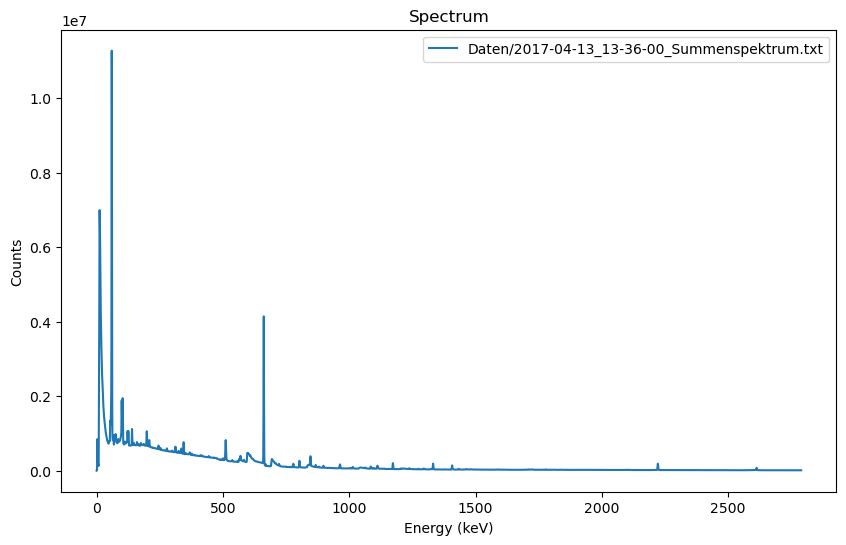

In [6]:
plot_spectrum_from_file(df.iloc[7]["filename"])